In [1]:
import pandas as pd
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# load the dataset into a pandas DataFrame
df = pd.read_csv("/content/Corona_NLP_test.csv")
# extract the "OriginalTweet" column and convert it to a list of strings
text = df['OriginalTweet'].tolist()



In [7]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# a) Convert the text corpus into tokens.

In [4]:
# tokenize the list of strings using the nltk library
tokens = [nltk.word_tokenize(word) for word in text]


# b) Perform stop word removal.

In [8]:
# perform stop word removal using the nltk library
stop_words = set(nltk.corpus.stopwords.words('english'))
filtered_tokens = [[word.lower() for word in words if word.lower() not in stop_words] for words in tokens]

# remove punctuation marks using the string module
no_punc_tokens = [[word.translate(str.maketrans("", "", string.punctuation)) for word in words] for words in filtered_tokens]

# c) Count Word frequencies

In [9]:
# count the word frequencies using the collections module
word_counts = Counter()
for word in no_punc_tokens:
    word_counts.update(word)

In [10]:
top_five_words = word_counts.most_common(10)
print(top_five_words)

[('', 26928), ('covid19', 2405), ('https', 1824), ('coronavirus', 1520), ('food', 1335), ('store', 1013), ('grocery', 816), ('people', 785), ('stock', 780), ('amp', 610)]


# d) Create word clouds

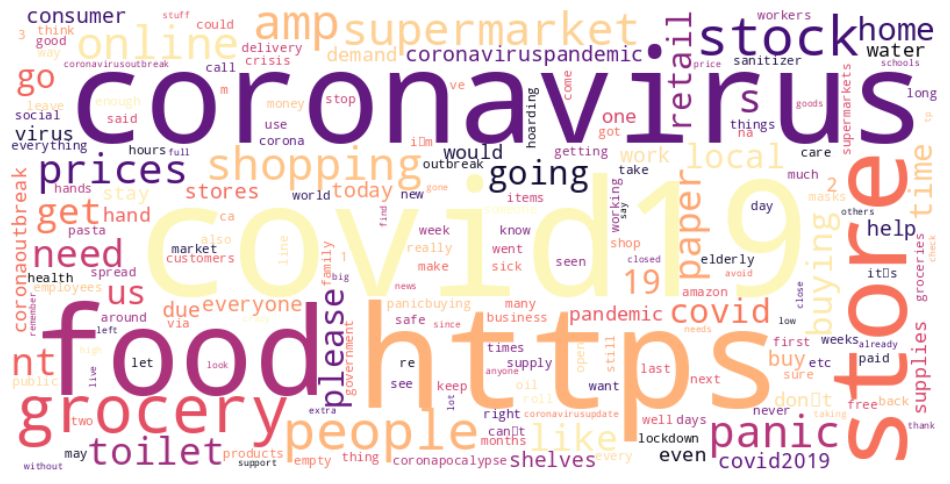

In [13]:
# create word clouds using the wordcloud library
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
